# Heart Failure Prediction


## Objectives

After completing this notebook you will be able to:

*   Use scikit-learn to implement Linear Regression, SVC, Decision Tree Classifier, KNN and Deep Forest Classifier
*   Create a model, train it, test it and use the model



<center>
    <img src="https://img.freepik.com/premium-psd/heart-medical-3d-icon-isolated_235528-794.jpg?w=1380" alt="Heart Failure Prediction" width="55%">
</center>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#understanding-data">Understanding the Data</a></li>
        <li><a href="https://#reading_data">Exploratory Data Analysis</a></li>
        <li><a href="https://#multiple_regression_model">Feature Engineering</a></li>
        <li><a href="https://#prediction">Modeling</a></li>
        <li><a href="https://#practice">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>



# <center><div style="font-family: Trebuchet MS; background-color: #ADD8E6; color: #00000; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Importing Needed Pakages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format= '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

### Loading Data

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


<h2 id="understanding_data">Understanding the Data</h2>

### `Heart.csv`:

We have downloaded a Heart Disease dataset, **`Heart.csv`**, which contains data driven from peoples having heart disease or not. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **AGE** e.g. 50
*   **Sex** e.g. M or F
*   **ChestPainType** e.g. ATA, NAP
*   **RestingBP** e.g. 140
*   **Cholesterol** e.g. 250
*   **FastingBS** e.g 0-1
*   **RestingECG** e.g. Normal, ST
*   **MaxHR** e.g. 172
*   **ExerciseAngina** e.g. N, Y
*   **Oldpeak** e.g. 1.50
*   **ST_Slope** e.g. Up, Flat
*   **HeartDisease** e.g. 0 and 1



In [3]:
data.shape

(918, 12)

In [4]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.00,53.51,9.43,28.00,47.00,54.00,60.00,77.00
RestingBP,918.00,132.40,18.51,0.00,120.00,130.00,140.00,200.00
Cholesterol,918.00,198.80,109.38,0.00,173.25,223.00,267.00,603.00
FastingBS,918.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
MaxHR,918.00,136.81,25.46,60.00,120.00,138.00,156.00,202.00
Oldpeak,918.00,0.89,1.07,-2.60,0.00,0.60,1.50,6.20
HeartDisease,918.00,0.55,0.50,0.00,0.00,1.00,1.00,1.00


**Count** Shows total number of samples in the data set. <br>
**Mean** shows avg of that particular features. <br>
**std** shows the standard deviation of the features. <br>
**min** shows the minimum value of that features. <br>
**25%** shows first quartile. <br>
**50%** shows second quartile. <br>
**75%** shows third quartile. <br>
**max** shows maximum value of data. <br>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Null Values

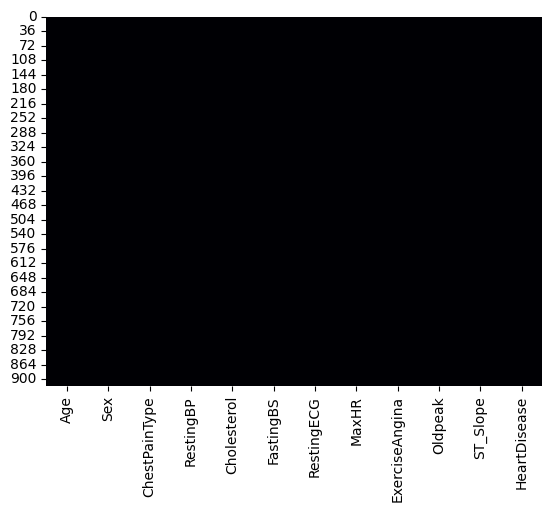

In [7]:
sns.heatmap(data.isnull(),cmap= 'magma', cbar = False);

***No Null Values in our dataset***

### Distribution of data in both Cases

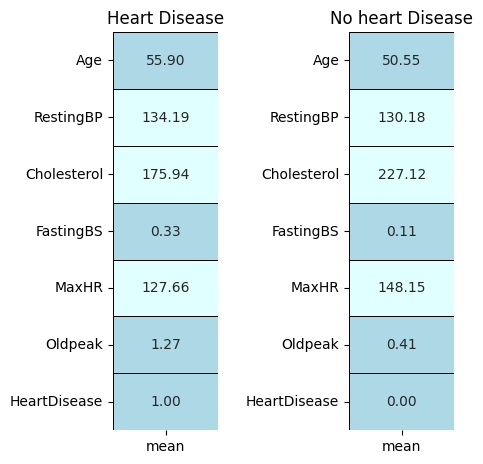

In [8]:
yes= data[data['HeartDisease'] == 1]. describe().T
no= data[data['HeartDisease']==0].describe().T
color= ['#ADD8E6','#E0FFFF']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))



plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],cmap= color, annot= True, cbar= False, linecolor= 'black', linewidths= 0.4, fmt= '.2f')
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean', ]], annot= True,cmap= color, linewidth= 0.4, linecolor= 'black', fmt= '.2f', cbar= False)
plt.title('No heart Disease')
fig.tight_layout(pad = 2)


# Exploratory Data Analysis

### Seperating Categorical Values and Numerical Values.
I did that manaually by looking at the data set because data set is small with limited features.

In [9]:
numerical_values=data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]    
categorical_values=data[['Sex', 'ChestPainType','FastingBS', 'RestingECG', 'ExerciseAngina','ST_Slope', 'HeartDisease']]

In [10]:
categorical_values.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0


In [11]:
numerical_values.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.00
1,49,160,180,156,1.00
2,37,130,283,98,0.00
3,48,138,214,108,1.50
4,54,150,195,122,0.00


In [12]:
categor=list(categorical_values)
numeric= list(numerical_values)

### Transforming data from string to encoder
By building copy of data and keep the deep True. This will keep the data in its original format if we change any thing in the data. 

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

### Distribution of ***Categorical Features*** against the output

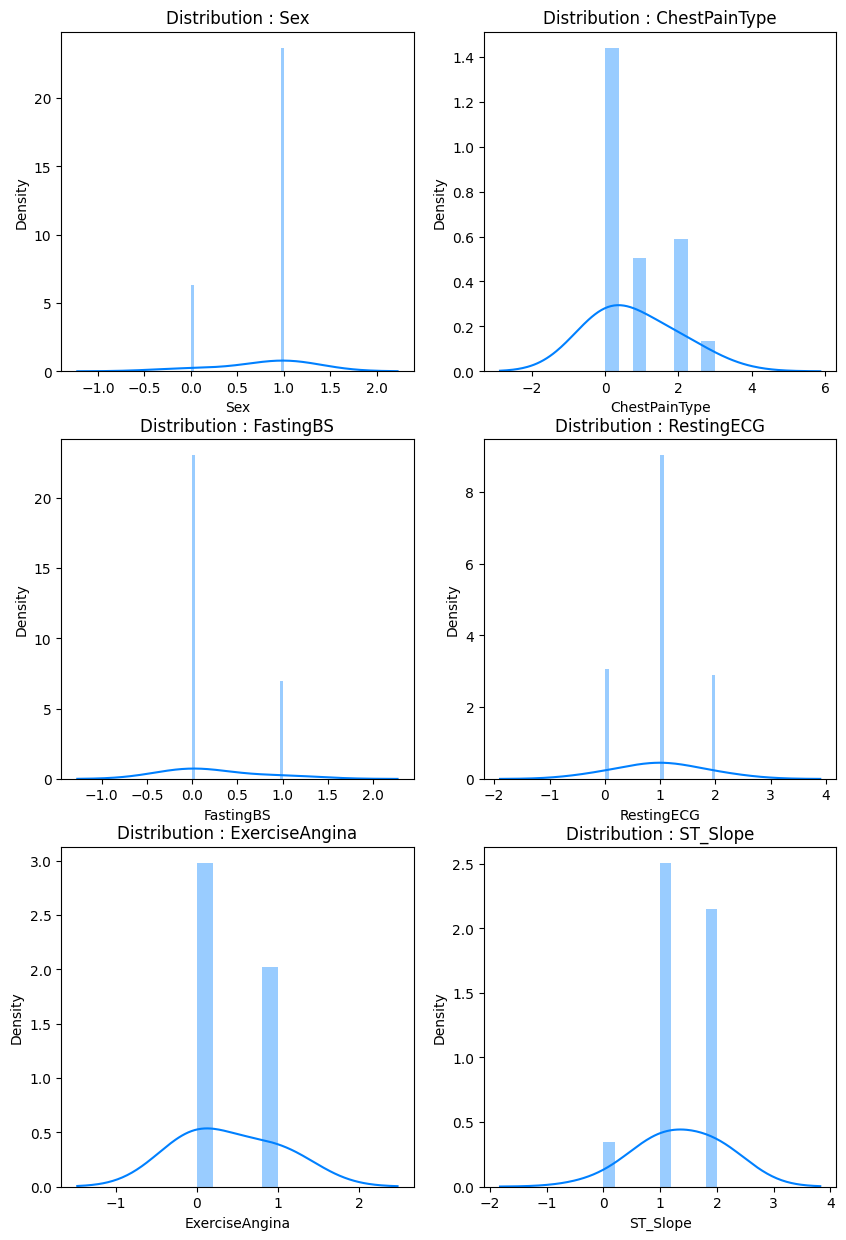

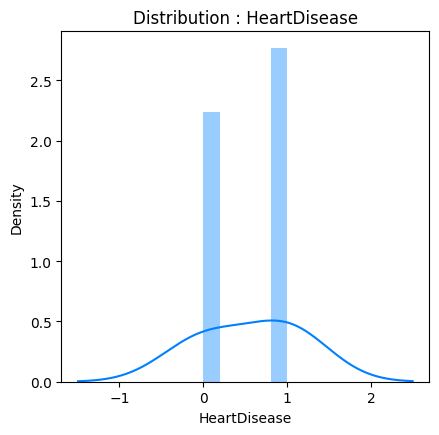

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categor) - 1):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categor[i]],kde_kws = {'bw' : 1},color = '#0080FF');
    title = 'Distribution : ' + categor[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[categor[len(categor) - 1]],kde_kws = {'bw' : 1},color = '#0080FF')
title = 'Distribution : ' + categor[len(categor) - 1]
plt.title(title);

***Categorical Features are Normally Distributed***

### Distribution of ***Numerical Features*** against the output

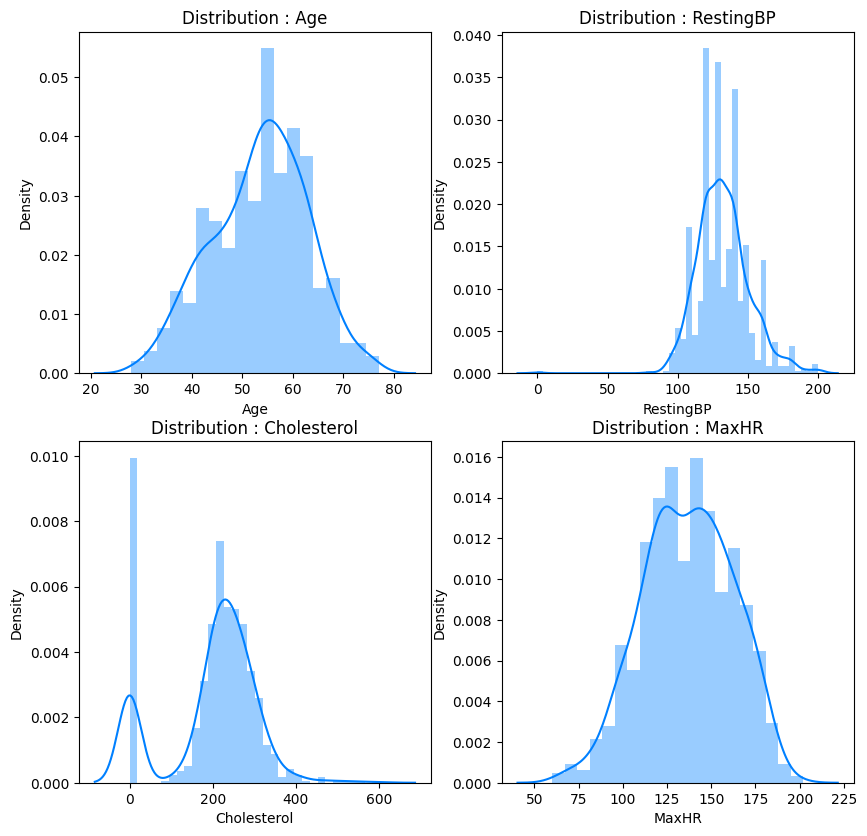

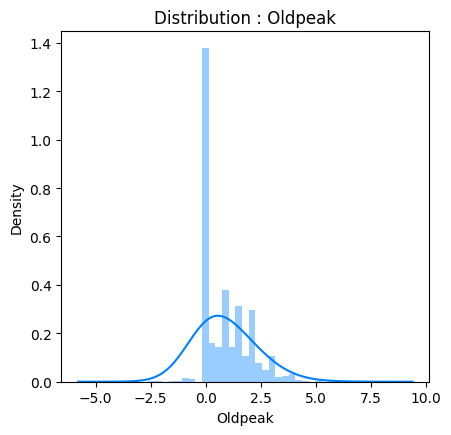

In [15]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numeric) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numeric[i]],color = '#0080FF')
    title = 'Distribution : ' + numeric[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numeric[len(numeric) - 1]],kde_kws = {'bw' : 1},color = '#0080FF')
title = 'Distribution : ' + numeric[len(numeric) - 1]
plt.title(title);

***Numerical Features are Normally Distributed***

### Overall Distribution of Data.

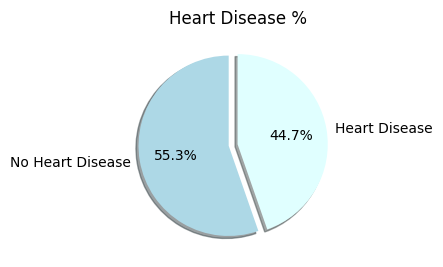

In [16]:
partition = list(data['HeartDisease'].value_counts())
plt.subplot(1,2,1)
plt.pie(partition,
        labels = ['No Heart Disease','Heart Disease'],
        autopct='%1.1f%%',
        startangle = 90,
        explode = (0.1,0),
        colors = color,
        shadow= True, 
       )
plt.title('Heart Disease %');


***Overall data is Normally Distributed***

### Impact of Categorical Features on the output

TypeError: countplot() got multiple values for argument 'data'

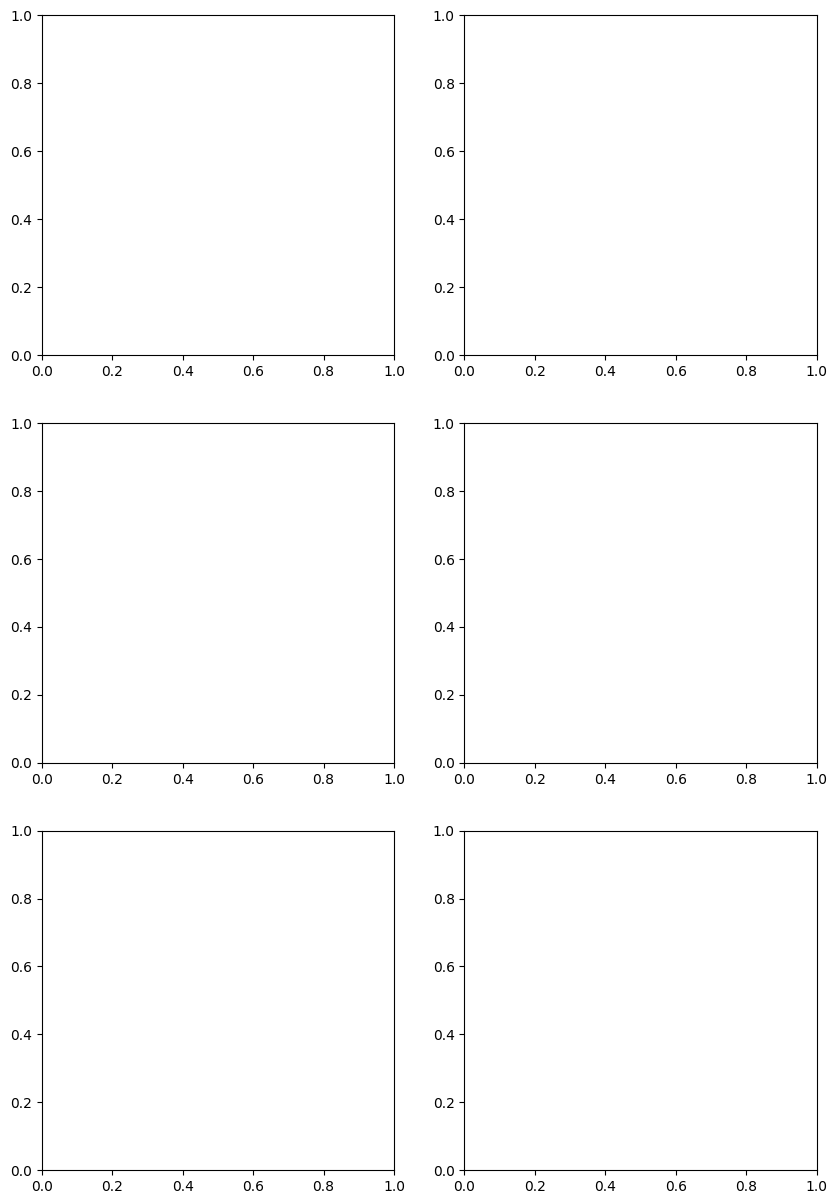

In [17]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categor) - 1):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(categor[i],data = data,hue = "HeartDisease",palette = color,edgecolor = 'black')



### Impact of Numerical Features on the output

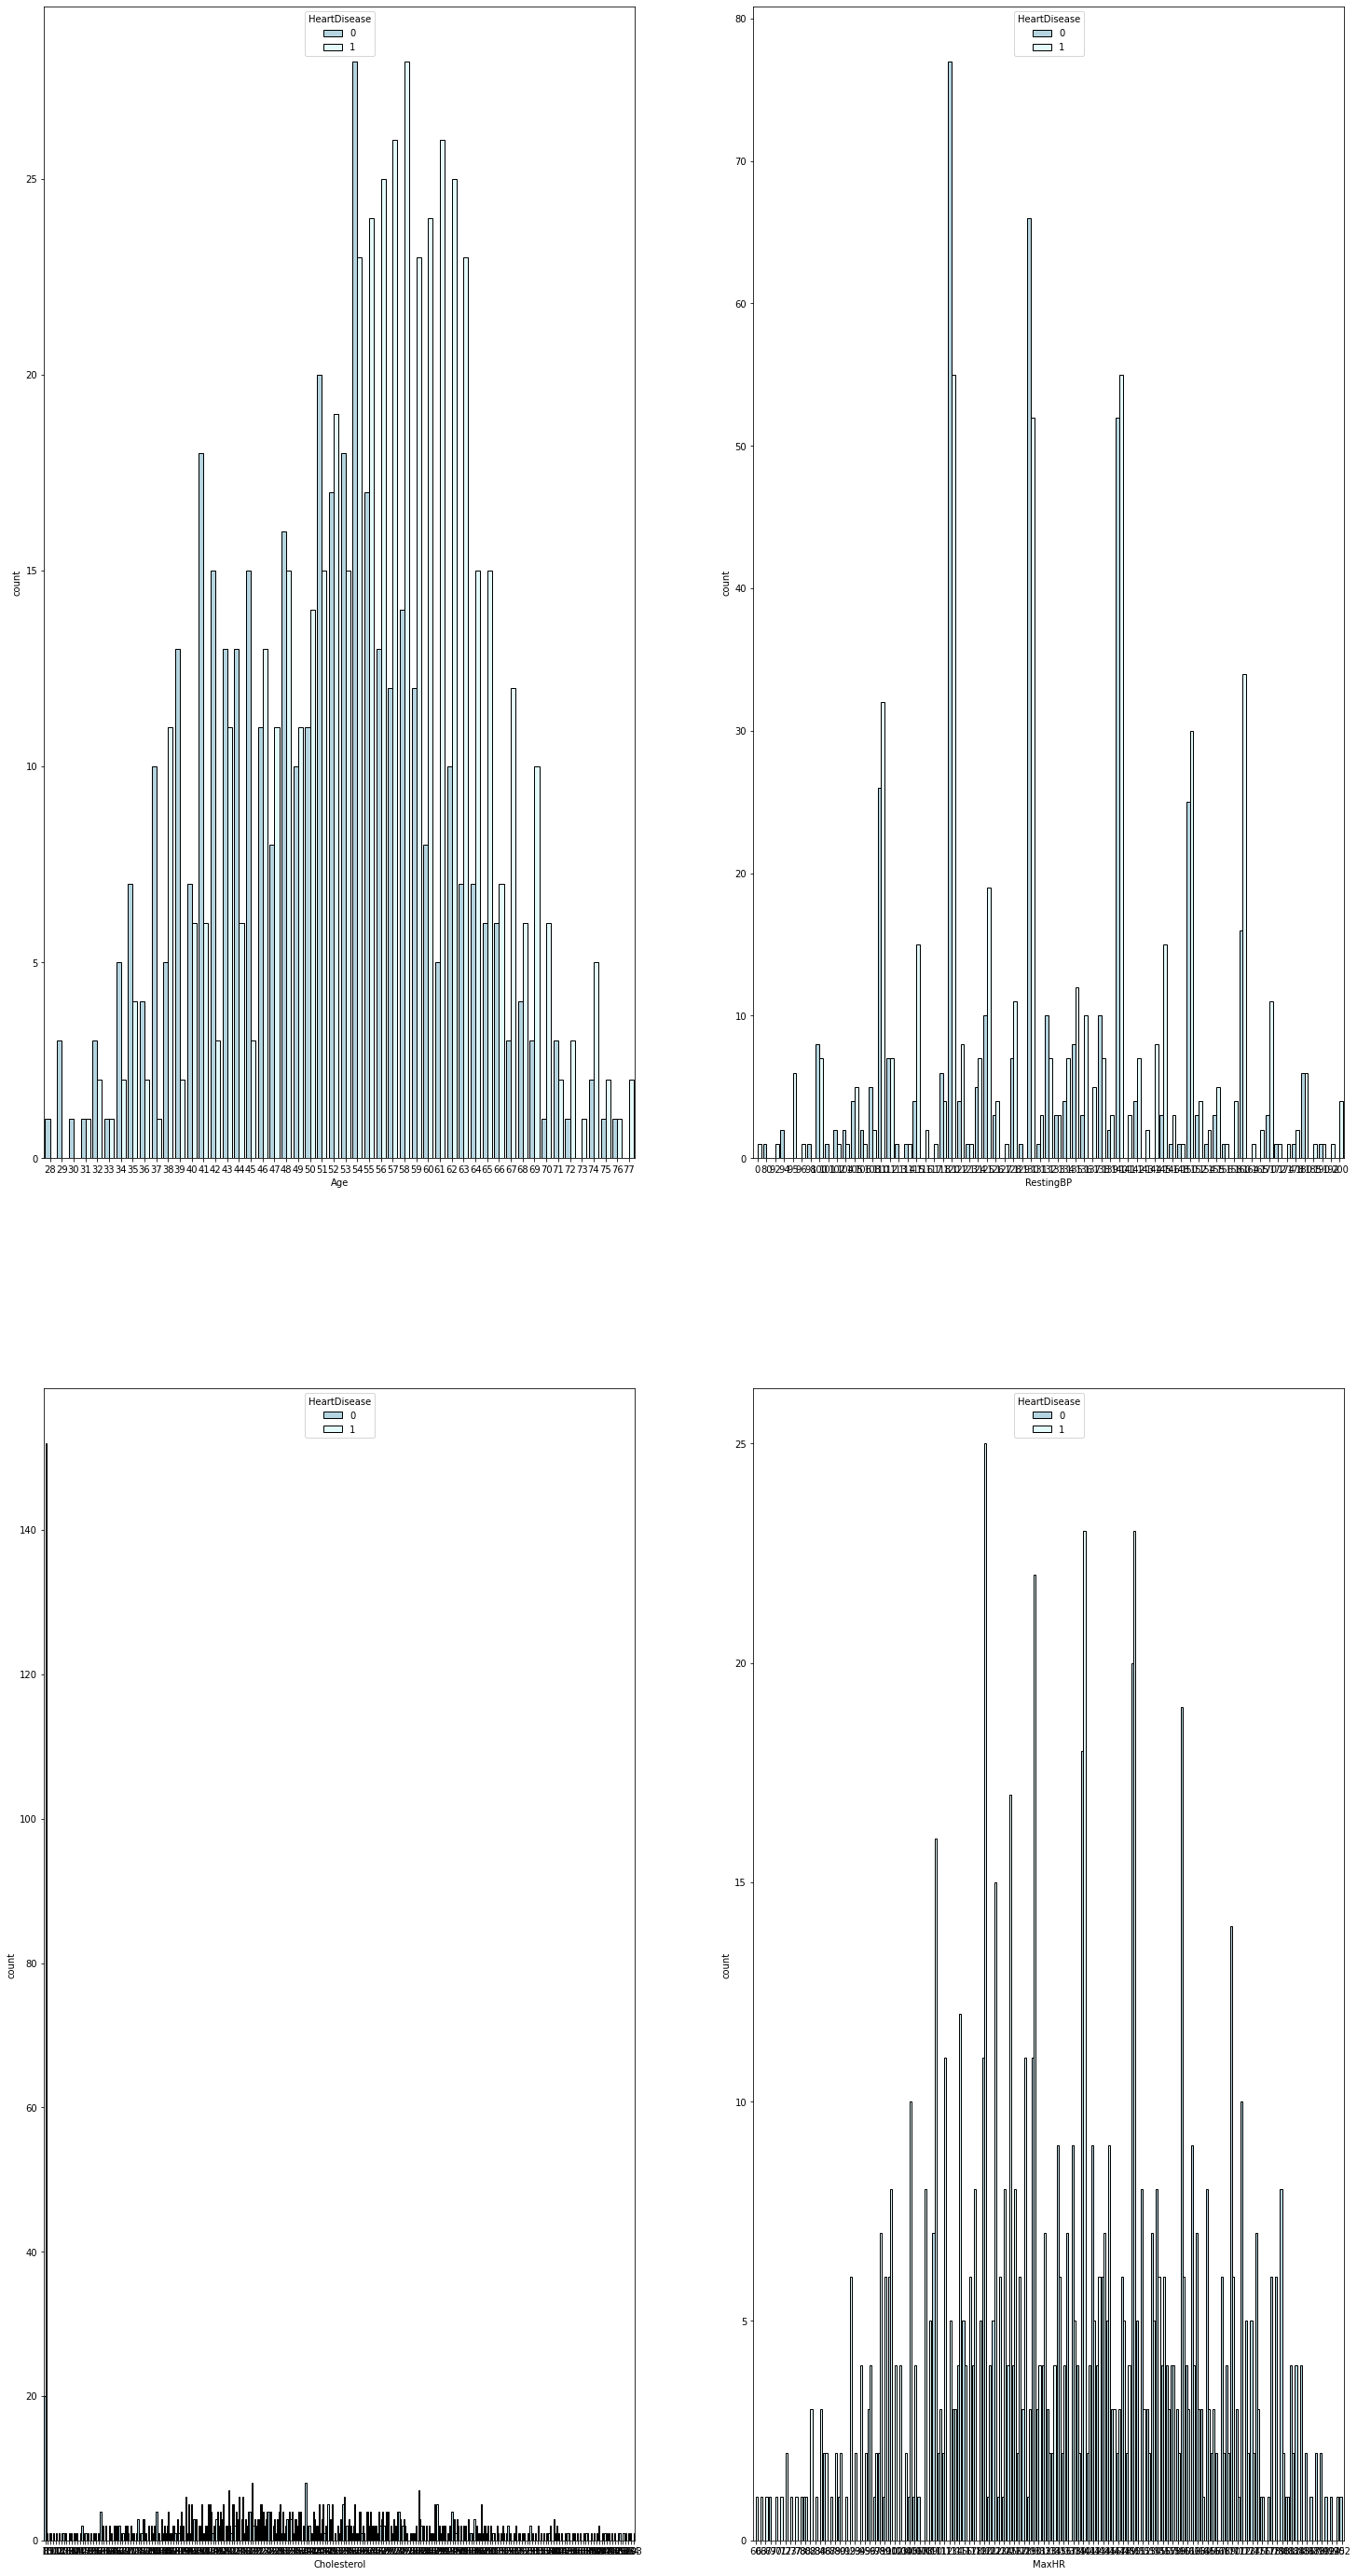

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (25,50))

for i in range(len(numeric) - 1):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(numeric[i],data = data,hue = "HeartDisease",palette = color,edgecolor = 'black')

***Because of too many unique points I made histograms to visualize the data***

<AxesSubplot: ylabel='Frequency'>

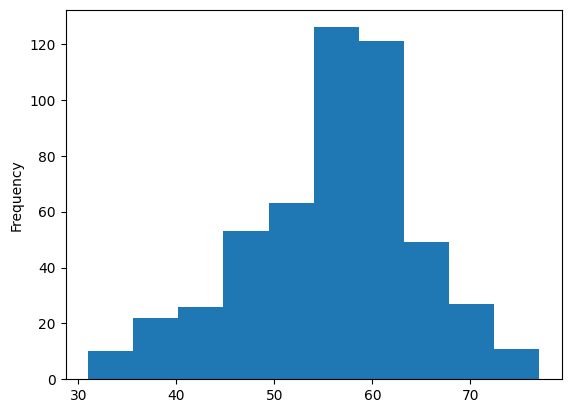

In [18]:
num1= data[data['HeartDisease']==1]['Age']
num1.plot(kind= 'hist')

From above plot it is clear ***AGE*** group above 50 is more prone to be detected with the heart disease

<AxesSubplot: ylabel='Frequency'>

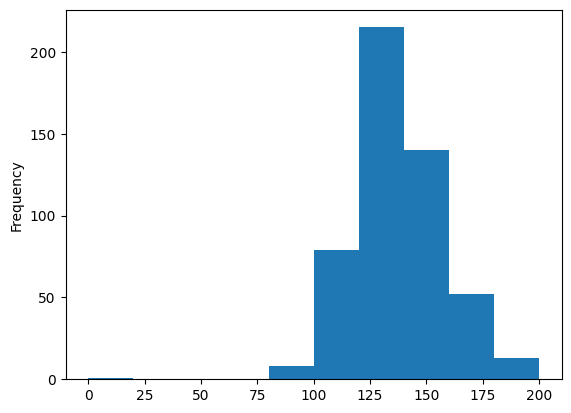

In [19]:
num2= data[data['HeartDisease']==1]['RestingBP' ]
#num2.plot(kind= 'box')
num2.plot(kind= 'hist')

- From the RestingBP group data, 95- 170 readings are most prone to be detected with heart diseases.
***Explanation:** In RestingBP, Distribution of data is too close with each other. Like First quartile start from 95 and ends at 125. while the data from 125 to 175 covers remaining data.

<AxesSubplot: ylabel='Frequency'>

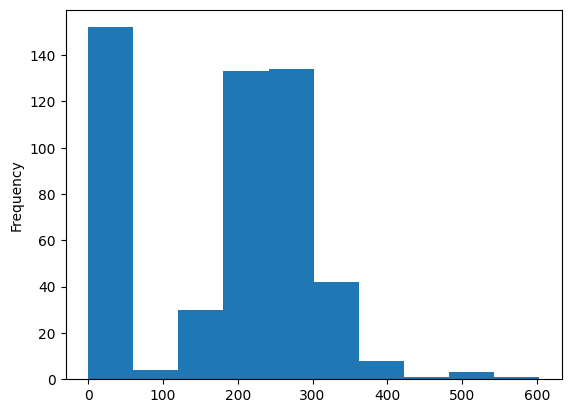

In [20]:
num3= data[data['HeartDisease']==1]['Cholesterol']
num3.plot(kind= 'hist')

- **Cholesterol** levels between **150** - **350** are highly susceptible to heart diseases.
**Explanation:** Data starts from 0 but mean is near 200. Further histogram plot shows that majority lies between 150 to 350

<AxesSubplot: ylabel='Frequency'>

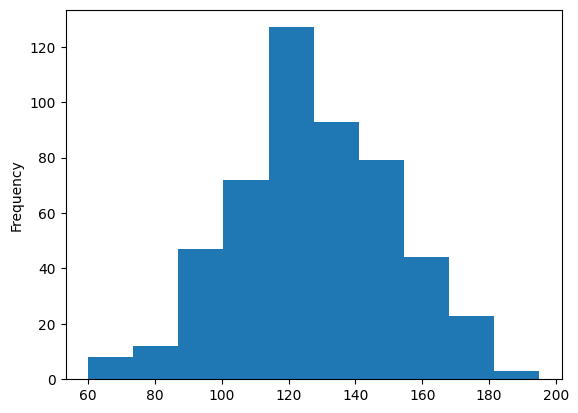

In [21]:
num4= data[data['HeartDisease']==1]['MaxHR']
num4.plot(kind= 'hist')

**Heart rate** from 70 to 180 is contributing in heart disease.

# Summary of EDA
### Order / Values of features for positive cases of heart disease :

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    
**Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!**


# Feature engineering

**Normalization and Strandardization**

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalize= MinMaxScaler()
standard= StandardScaler()
df1['Oldpeak']= normalize.fit_transform(df1[['Oldpeak']])
df1['Age']= standard.fit_transform(df1[['Age']])
df1['RestingBP']= standard.fit_transform(df1[['RestingBP']])
df1['Cholesterol']= standard.fit_transform(df1[['Cholesterol']])
df1['MaxHR']= standard.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


<AxesSubplot: >

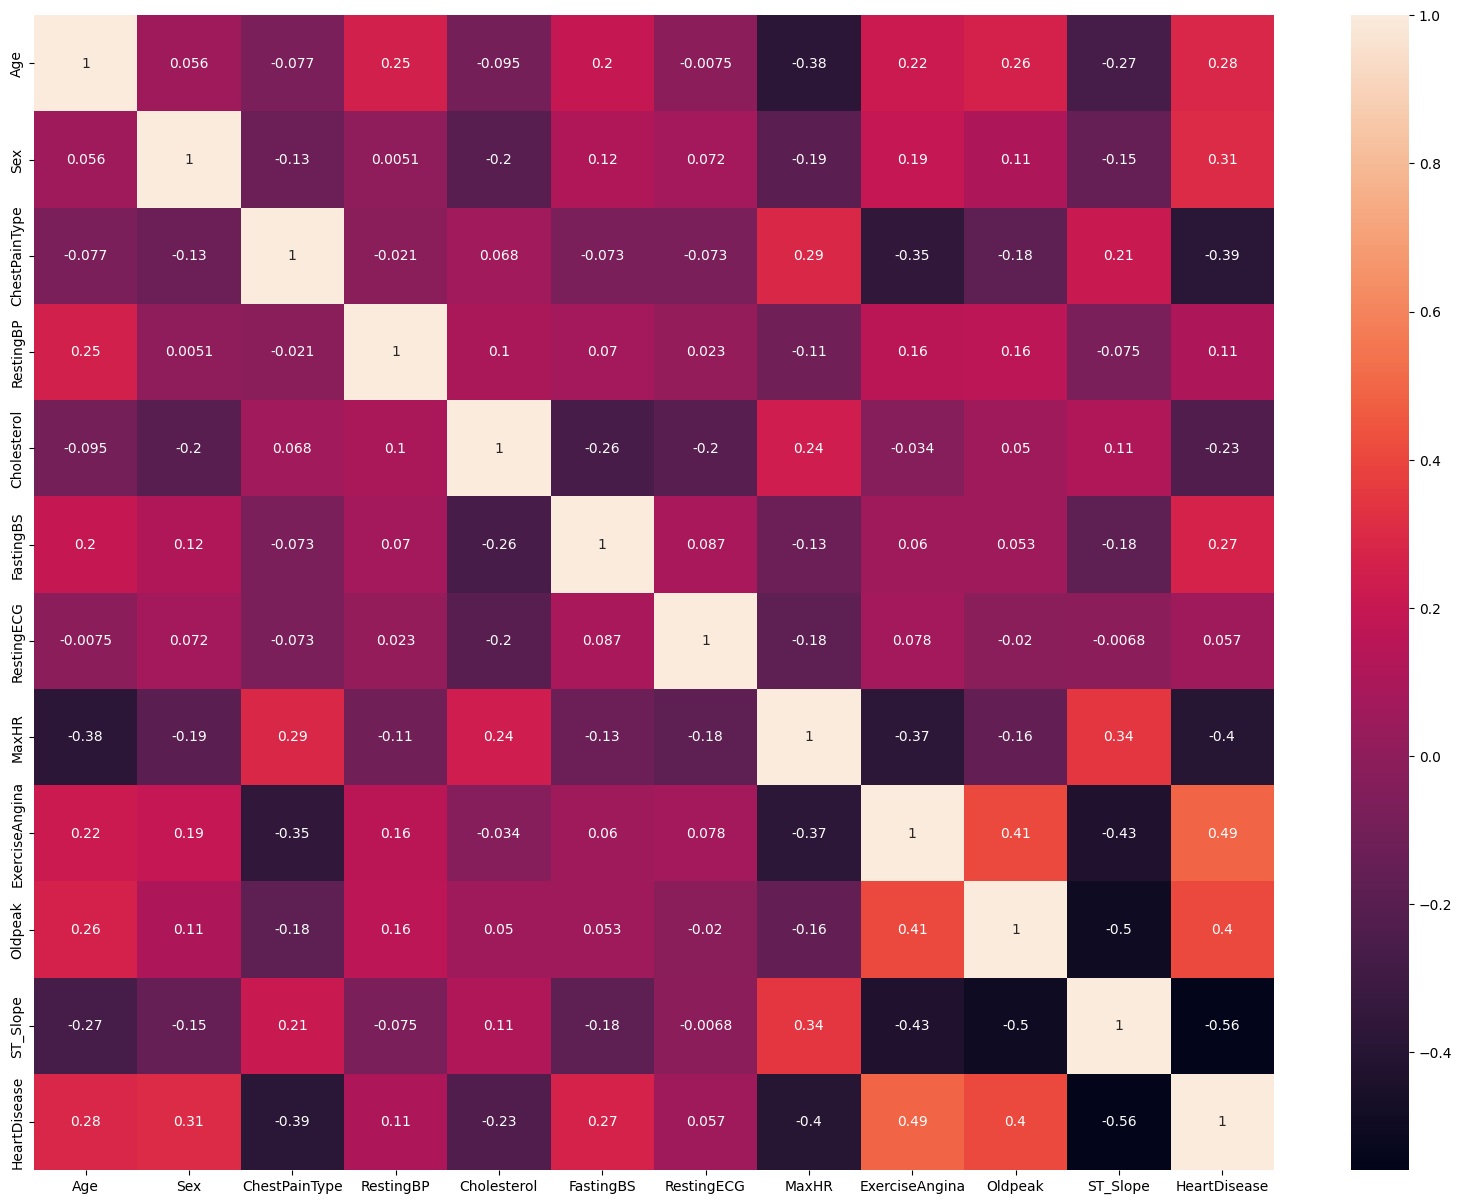

In [23]:
corr=df1.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot = True)

In [24]:
corr=df1.corr()
corrr= pd.DataFrame(corr)
corrr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.00,0.06,-0.08,0.25,-0.10,0.20,-0.01,-0.38,0.22,0.26,-0.27,0.28
Sex,0.06,1.00,-0.13,0.01,-0.20,0.12,0.07,-0.19,0.19,0.11,-0.15,0.31
ChestPainType,-0.08,-0.13,1.00,-0.02,0.07,-0.07,-0.07,0.29,-0.35,-0.18,0.21,-0.39
RestingBP,0.25,0.01,-0.02,1.00,0.10,0.07,0.02,-0.11,0.16,0.16,-0.08,0.11
Cholesterol,-0.10,-0.20,0.07,0.10,1.00,-0.26,-0.20,0.24,-0.03,0.05,0.11,-0.23
FastingBS,0.20,0.12,-0.07,0.07,-0.26,1.00,0.09,-0.13,0.06,0.05,-0.18,0.27
RestingECG,-0.01,0.07,-0.07,0.02,-0.20,0.09,1.00,-0.18,0.08,-0.02,-0.01,0.06
MaxHR,-0.38,-0.19,0.29,-0.11,0.24,-0.13,-0.18,1.00,-0.37,-0.16,0.34,-0.40
ExerciseAngina,0.22,0.19,-0.35,0.16,-0.03,0.06,0.08,-0.37,1.00,0.41,-0.43,0.49
Oldpeak,0.26,0.11,-0.18,0.16,0.05,0.05,-0.02,-0.16,0.41,1.00,-0.50,0.40


In [25]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()

All features are correalted to the output except **RestingBP** and **RestingECG.**
In modelling these featured will be droped.

# Modeling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [27]:
X= df1[df1.columns.drop(['RestingECG', 'HeartDisease','RestingBP'])].values
Y = df1['HeartDisease'].values
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state=2)

In [28]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = color,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### -Logistic Regression

Accuracy :  87.50%
Cross Validation Score :  91.12%
ROC_AUC Score :  87.43%


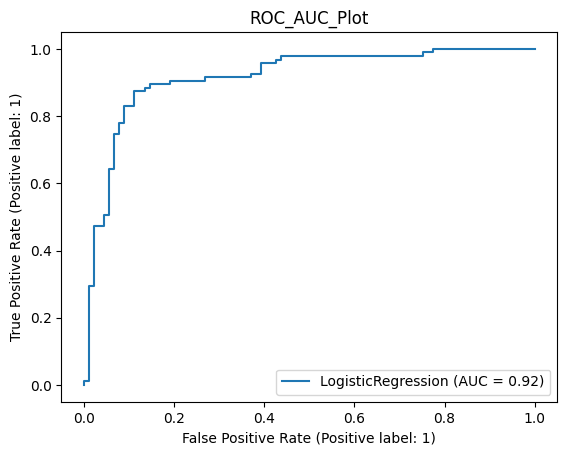

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



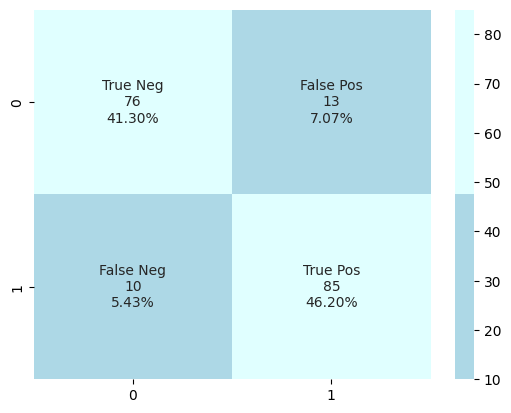

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0, C= 10, penalty= 'l2')
model(classifier_lr)
model_evaluation(classifier_lr)

### -Suppor Vector Classifier 

Accuracy :  87.50%
Cross Validation Score :  90.53%
ROC_AUC Score :  87.43%


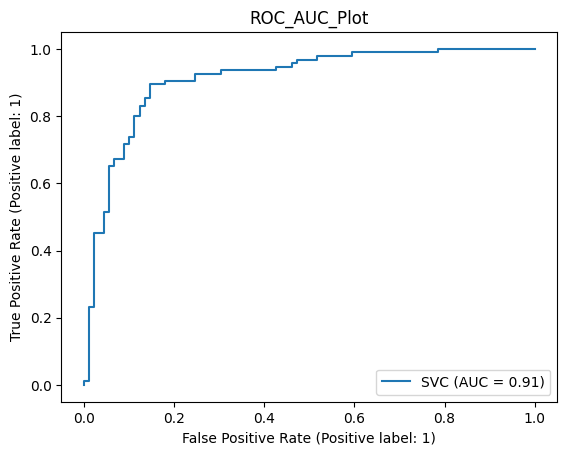

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



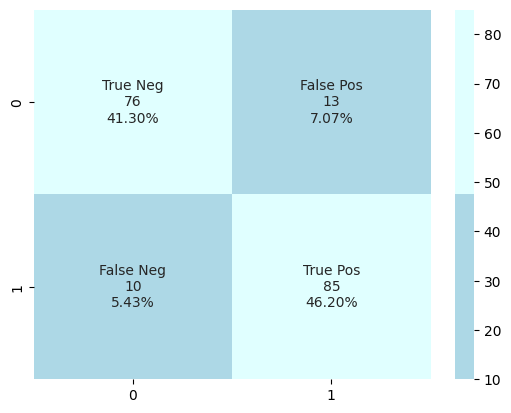

In [30]:
from sklearn.svm import SVC
classifierSVC= SVC(kernel = 'linear', C= 0.1)
model(classifierSVC)
model_evaluation(classifierSVC)

### -Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
HDtree= DecisionTreeClassifier(criterion="entropy", random_state= 1000, max_depth= 4, min_samples_leaf = 1)
HDtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1000)

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
predtree= HDtree.predict(x_test)

In [33]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

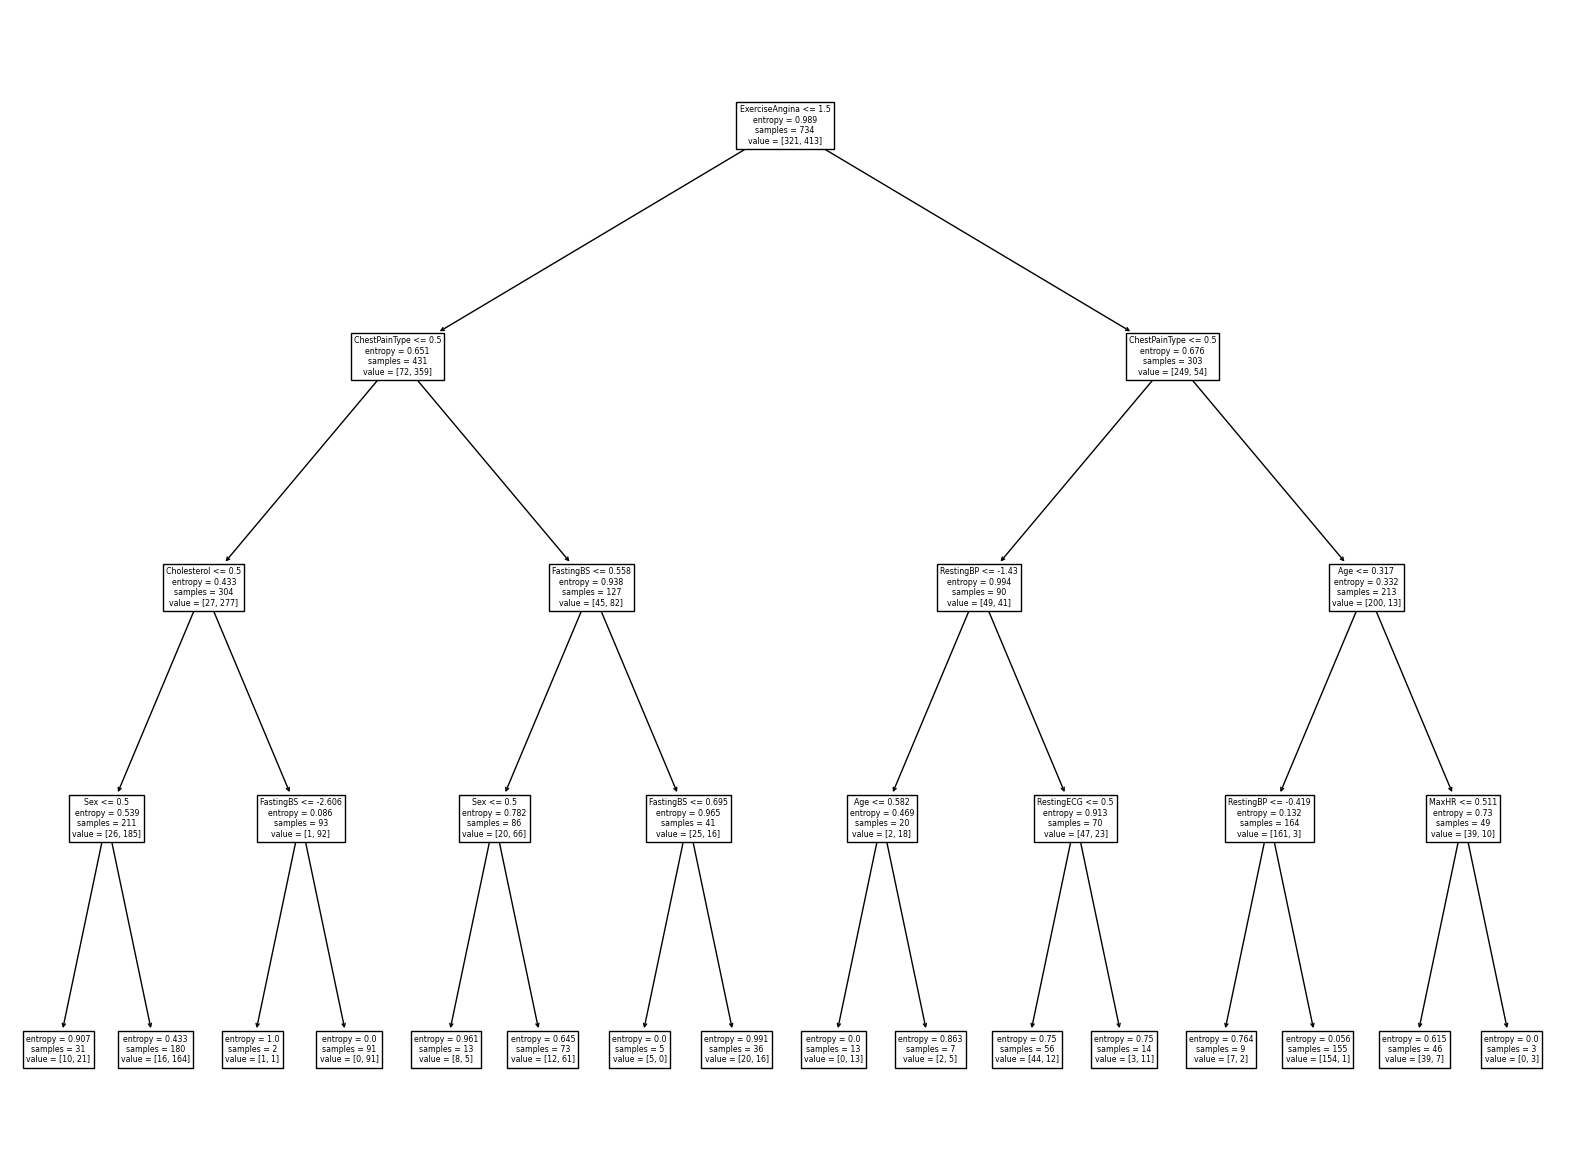

In [34]:
import sklearn.tree as tree
plt.subplots(figsize=(20,15))
tree.plot_tree(HDtree,feature_names=df1.columns)
plt.show()

Accuracy :  83.70%
Cross Validation Score :  88.50%
ROC_AUC Score :  83.50%


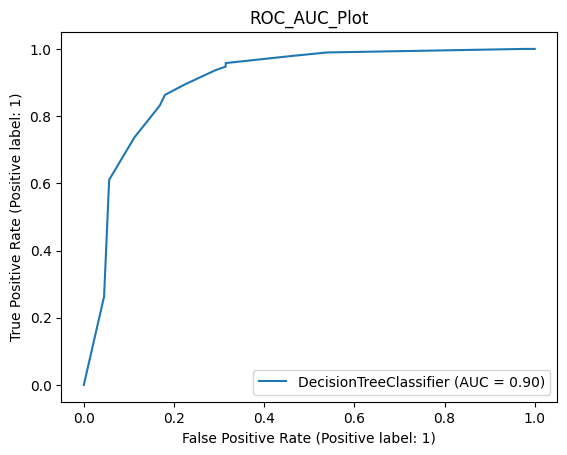

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        89
           1       0.81      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



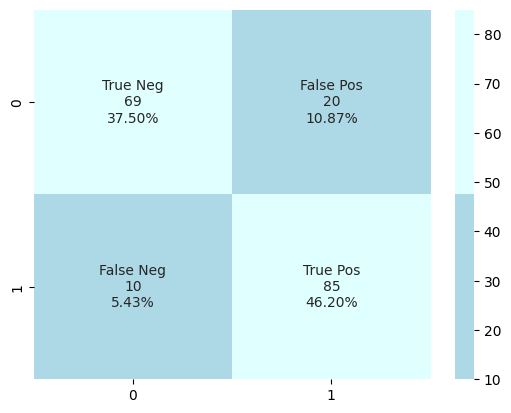

In [35]:
model(HDtree)   
model_evaluation(HDtree)

### -Random Forest Classifier

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


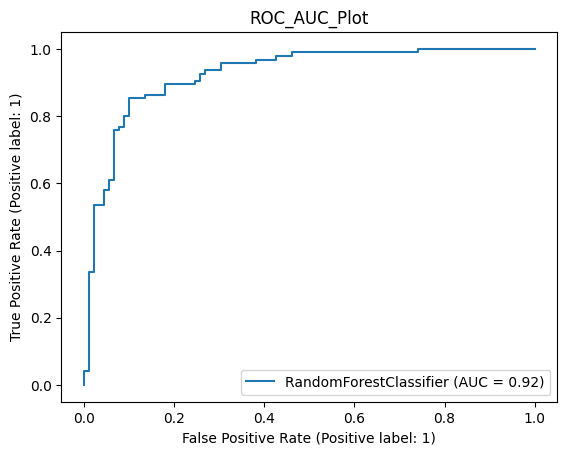

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



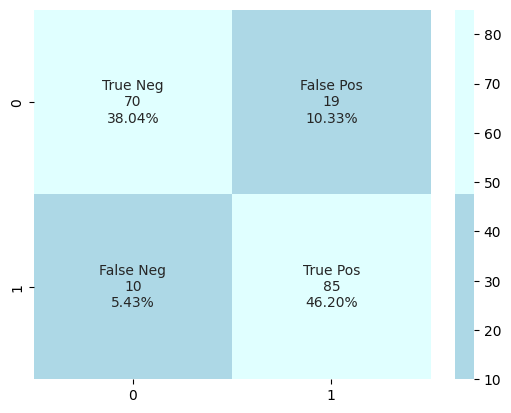

In [36]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(max_depth = 4,random_state = 0)
model(RFclassifier)
model_evaluation(RFclassifier)

### -K Nearest Neighbour KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77717391, 0.78804348, 0.79347826, 0.80978261, 0.80978261,
       0.82608696, 0.82608696, 0.83695652, 0.84782609])

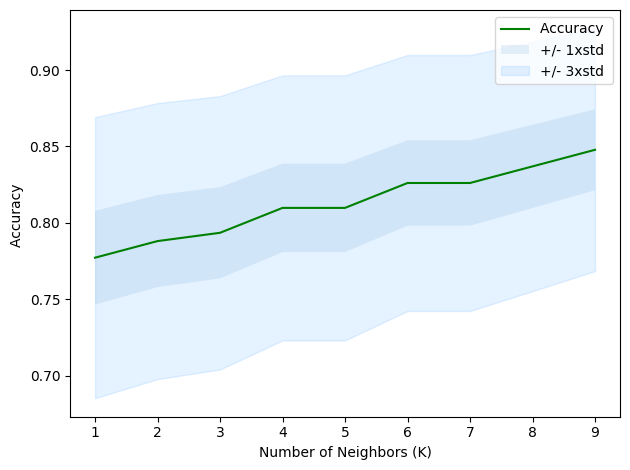

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="#0080FF")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

***Best accuracy with K = 9***

Accuracy :  85.87%
Cross Validation Score :  91.48%
ROC_AUC Score :  85.68%


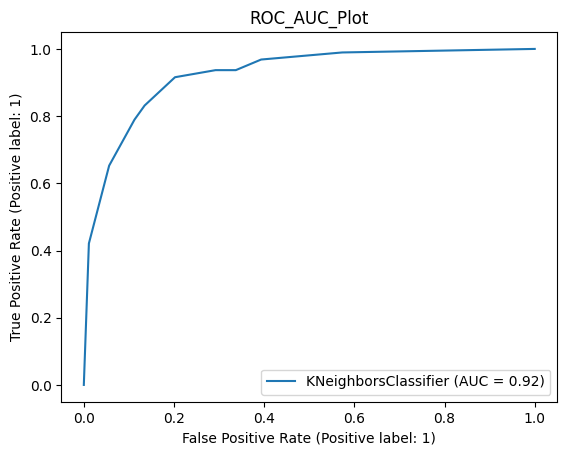

              precision    recall  f1-score   support

           0       0.90      0.80      0.85        89
           1       0.83      0.92      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



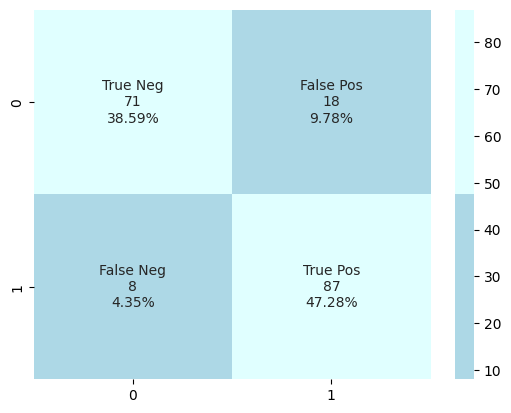

In [39]:
KNNclassifier= KNeighborsClassifier(leaf_size = 1, n_neighbors = 9, p = 1)
model(KNNclassifier)
model_evaluation(KNNclassifier)

## Algorithms scores

|Sr. No.|ML Algorithm|Accuracy|Cross Validation Score|ROC AUC Score|
|-|-|-|-|-|
|1|Logistic Regression|87.50%|91.12%|87.43%|
|2|Support Vector Classifier|87.50%|90.53%|87.43%|
|3|Decision Tree Classifier|83.78%|88.09%|83.62%|
|4|Random Forest Classifier|84.24%|92.91%|84.06%|
|5|K-Nearest Neighbors Classfier|85.52%|91.34%|85.36%|

# <center><div style="font-family: Trebuchet MS; background-color: #ADD8E6; color: #00000; padding: 12px; line-height: 1;">Please upvote if you like the work!</div></center><center><div style="font-family: Trebuchet MS; background-color: #ADD8E6; color: #00000; padding: 12px; line-height: 1;">Thank You!</div></center>